# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [34]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    def __init__(self, num_decks=6):
        self.cards = []
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        for _ in range(num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        self.cards.append("Plastic Card")
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) == 0:
            self.reset_deck()
        return self.cards.pop()

    def reset_deck(self):
        self.__init__()


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

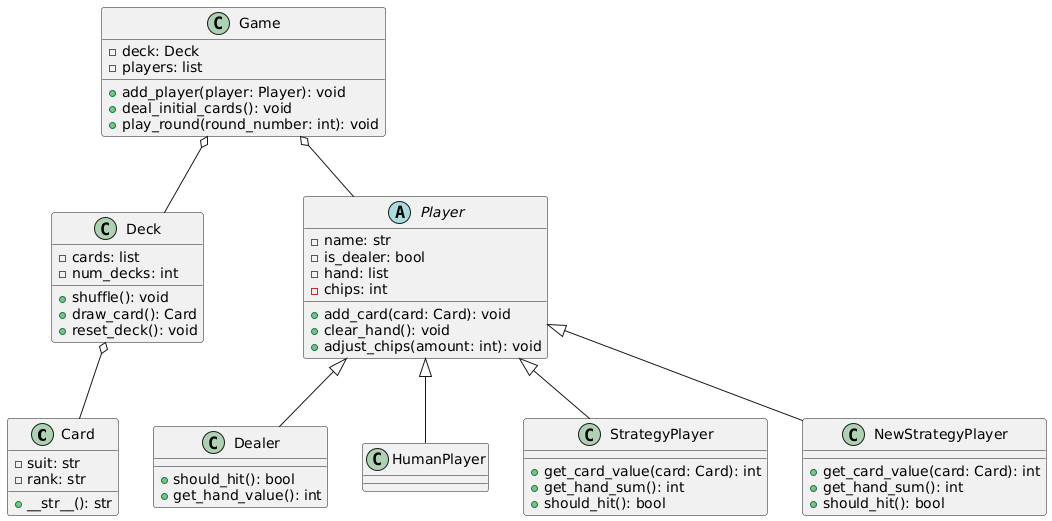

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [24]:
class Player:
    def __init__(self, name, is_dealer=False):
        self.name = name
        self.is_dealer = is_dealer
        self.hand = []
        self.chips = 100

    def add_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

    def adjust_chips(self, amount):
        self.chips += amount


class Game:
    def __init__(self):
        self.deck = Deck()
        self.players = []
        self.deck.shuffle()

    def add_player(self, player):
        self.players.append(player)

    def deal_initial_cards(self):
        for player in self.players:
            player.add_card(self.deck.draw_card())
            player.add_card(self.deck.draw_card())

    def play_round(self, round_number):
        self.deck.shuffle()
        self.deal_initial_cards()
        print(f"\n--- Round {round_number} ---")
        for player in self.players:
            hand_str = ', '.join([str(card) for card in player.hand])
            print(f"{player.name}'s hand: [{hand_str}]")
        for player in self.players:
            player.clear_hand()

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [20]:
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", is_dealer=True)

    def should_hit(self):
        return self.get_hand_value() < 16

    def get_hand_value(self):
        value = 0
        aces = 0
        for card in self.hand:
            if card.rank in ['Jack', 'Queen', 'King']:
                value += 10
            elif card.rank == 'Ace':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value


class HumanPlayer(Player):
    def __init__(self, name):
        super().__init__(name)

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [35]:
game = Game()
game.add_player(Dealer())
game.add_player(HumanPlayer("Player 1"))

# Simulate several rounds of play
num_rounds = 5
for round_number in range(1, num_rounds + 1):
    game.play_round(round_number)


--- Round 1 ---
Dealer's hand: [3 of Spades, 7 of Hearts]
Player 1's hand: [Queen of Hearts, 2 of Hearts]

--- Round 2 ---
Dealer's hand: [10 of Clubs, 2 of Diamonds]
Player 1's hand: [King of Diamonds, 7 of Hearts]

--- Round 3 ---
Dealer's hand: [5 of Clubs, Ace of Hearts]
Player 1's hand: [4 of Hearts, Queen of Diamonds]

--- Round 4 ---
Dealer's hand: [8 of Spades, 5 of Diamonds]
Player 1's hand: [9 of Hearts, 8 of Diamonds]

--- Round 5 ---
Dealer's hand: [3 of Diamonds, 5 of Diamonds]
Player 1's hand: [9 of Hearts, 7 of Hearts]


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [26]:
class StrategyPlayer(Player):
    def __init__(self, name):
        super().__init__(name)

    def get_card_value(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif card.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

    def get_hand_sum(self):
        return sum(self.get_card_value(card) for card in self.hand)

    def should_hit(self):
        hand_sum = self.get_hand_sum()
        return hand_sum < 0

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [36]:
game = Game()
game.add_player(Dealer())
game.add_player(StrategyPlayer("Strategy Player"))
game.add_player(HumanPlayer("Player 2"))
game.add_player(HumanPlayer("Player 3"))

# Play 50 rounds or until Strategy Player runs out of chips
num_rounds = 50
rounds_played = 0
while rounds_played < num_rounds and game.players[1].chips > 0:
    print(f"\n--- Round {rounds_played + 1} ---")
    game.play_round(rounds_played + 1)
    rounds_played += 1
    # Simulate winnings/losses (simplified)
    game.players[1].adjust_chips(random.randint(-10, 10))
    print(f"{game.players[1].name}'s chips after round {rounds_played}: {game.players[1].chips}")


--- Round 1 ---

--- Round 1 ---
Dealer's hand: [9 of Spades, 6 of Hearts]
Strategy Player's hand: [10 of Clubs, 8 of Hearts]
Player 2's hand: [2 of Spades, 9 of Diamonds]
Player 3's hand: [King of Clubs, 6 of Hearts]
Strategy Player's chips after round 1: 102

--- Round 2 ---

--- Round 2 ---
Dealer's hand: [Plastic Card, King of Diamonds]
Strategy Player's hand: [King of Clubs, 8 of Diamonds]
Player 2's hand: [Queen of Hearts, Jack of Spades]
Player 3's hand: [2 of Diamonds, Queen of Diamonds]
Strategy Player's chips after round 2: 104

--- Round 3 ---

--- Round 3 ---
Dealer's hand: [3 of Diamonds, 6 of Hearts]
Strategy Player's hand: [4 of Spades, 8 of Hearts]
Player 2's hand: [8 of Diamonds, 9 of Diamonds]
Player 3's hand: [Queen of Diamonds, 5 of Hearts]
Strategy Player's chips after round 3: 110

--- Round 4 ---

--- Round 4 ---
Dealer's hand: [7 of Spades, King of Spades]
Strategy Player's hand: [King of Diamonds, 2 of Diamonds]
Player 2's hand: [6 of Clubs, Jack of Clubs]
Pla

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?



--- Round 1 ---
Dealer's hand: [9 of Diamonds, Ace of Clubs]
Strategy Player's hand: [King of Hearts, 5 of Hearts]
Player 2's hand: [Jack of Spades, Jack of Diamonds]
Player 3's hand: [King of Diamonds, Ace of Diamonds]

--- Round 2 ---
Dealer's hand: [7 of Spades, 7 of Hearts]
Strategy Player's hand: [9 of Hearts, 6 of Clubs]
Player 2's hand: [6 of Diamonds, Queen of Diamonds]
Player 3's hand: [2 of Clubs, 2 of Diamonds]

--- Round 3 ---
Dealer's hand: [2 of Spades, 10 of Clubs]
Strategy Player's hand: [7 of Clubs, 8 of Hearts]
Player 2's hand: [9 of Hearts, King of Clubs]
Player 3's hand: [6 of Diamonds, 7 of Clubs]

--- Round 4 ---
Dealer's hand: [Queen of Hearts, 3 of Hearts]
Strategy Player's hand: [4 of Spades, 8 of Diamonds]
Player 2's hand: [2 of Clubs, 2 of Hearts]
Player 3's hand: [7 of Clubs, Jack of Spades]

--- Round 5 ---
Dealer's hand: [2 of Diamonds, 7 of Hearts]
Strategy Player's hand: [5 of Spades, 6 of Clubs]
Player 2's hand: [7 of Spades, 3 of Clubs]
Player 3's han

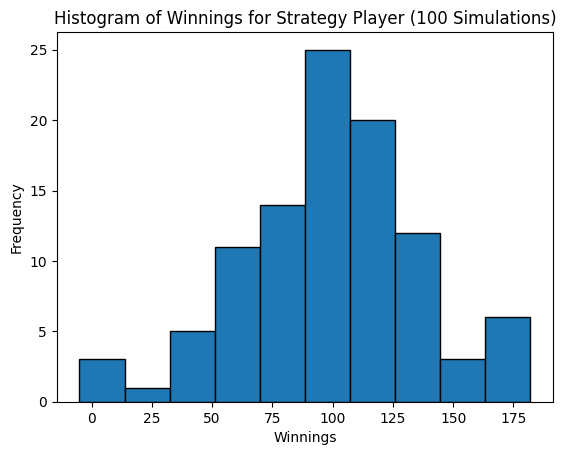

Average Winnings: 98.66
Standard Deviation of Winnings: 37.35778901380541
Probability of Net Winning (Chips > 100): 49.0%


In [38]:
import numpy as np

winnings = []
num_simulations = 100
for _ in range(num_simulations):
    strategy_player = StrategyPlayer("Strategy Player")
    game = Game()
    game.add_player(Dealer())
    game.add_player(strategy_player)
    game.add_player(HumanPlayer("Player 2"))
    game.add_player(HumanPlayer("Player 3"))
    
    rounds_played = 0
    while rounds_played < num_rounds and strategy_player.chips > 0:
        game.play_round(rounds_played + 1)
        rounds_played += 1
        # Simulate winnings/losses (simplified)
        strategy_player.adjust_chips(random.randint(-10, 10))
    winnings.append(strategy_player.chips)

# Histogram of winnings
plt.hist(winnings, bins=10, edgecolor='black')
plt.xlabel('Winnings')
plt.ylabel('Frequency')
plt.title('Histogram of Winnings for Strategy Player (100 Simulations)')
plt.show()

# Calculate statistics
average_winnings = np.mean(winnings)
std_dev_winnings = np.std(winnings)
prob_net_winning = np.sum(np.array(winnings) > 100) / num_simulations

print(f"Average Winnings: {average_winnings}")
print(f"Standard Deviation of Winnings: {std_dev_winnings}")
print(f"Probability of Net Winning (Chips > 100): {prob_net_winning * 100}%")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [42]:
thresholds = [-2, -1, 0, 1, 2]
best_threshold = None
highest_average_winnings = float('-inf')

for threshold in thresholds:
    winnings = []
    for _ in range(100):
        strategy_player = StrategyPlayer("Strategy Player")
        game = Game()
        game.add_player(Dealer())
        game.add_player(strategy_player)
        game.add_player(HumanPlayer("Player 2"))
        game.add_player(HumanPlayer("Player 3"))
        
        rounds_played = 0
        while rounds_played < num_rounds and strategy_player.chips > 0:
            game.play_round(rounds_played + 1)
            rounds_played += 1
            # Simulate winnings/losses (simplified)
            strategy_player.adjust_chips(random.randint(-10, 10))
        winnings.append(strategy_player.chips)
    average_winnings = sum(winnings) / len(winnings)
    print(f"Threshold {threshold}: Average Winnings = {average_winnings}")
    if average_winnings > highest_average_winnings:
        highest_average_winnings = average_winnings
        best_threshold = threshold

print(f"The best threshold value is {best_threshold}")


--- Round 1 ---
Dealer's hand: [4 of Spades, 2 of Diamonds]
Strategy Player's hand: [5 of Diamonds, Ace of Clubs]
Player 2's hand: [5 of Clubs, 10 of Diamonds]
Player 3's hand: [7 of Clubs, Jack of Diamonds]

--- Round 2 ---
Dealer's hand: [Ace of Diamonds, 5 of Spades]
Strategy Player's hand: [7 of Spades, Jack of Spades]
Player 2's hand: [4 of Clubs, 6 of Clubs]
Player 3's hand: [6 of Hearts, Queen of Spades]

--- Round 3 ---
Dealer's hand: [3 of Hearts, 2 of Diamonds]
Strategy Player's hand: [3 of Clubs, 7 of Hearts]
Player 2's hand: [7 of Spades, 5 of Spades]
Player 3's hand: [10 of Hearts, King of Hearts]

--- Round 4 ---
Dealer's hand: [Queen of Clubs, 8 of Diamonds]
Strategy Player's hand: [7 of Hearts, 2 of Diamonds]
Player 2's hand: [6 of Spades, 3 of Spades]
Player 3's hand: [6 of Diamonds, 10 of Hearts]

--- Round 5 ---
Dealer's hand: [5 of Spades, 7 of Hearts]
Strategy Player's hand: [6 of Diamonds, Ace of Hearts]
Player 2's hand: [5 of Clubs, Queen of Diamonds]
Player 3's

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [44]:
strategies = [
    StrategyPlayer("Original Strategy Player"),
    NewStrategyPlayer("New Strategy Player")
]

# Adding players with different strategies
strategy_results = {}

for strategy_player in strategies:
    winnings = []
    for _ in range(100):
        game = Game()
        game.add_player(Dealer())
        game.add_player(strategy_player)
        game.add_player(HumanPlayer("Player 2"))
        game.add_player(HumanPlayer("Player 3"))
        
        rounds_played = 0
        while rounds_played < num_rounds and strategy_player.chips > 0:
            game.play_round(rounds_played + 1)
            rounds_played += 1
            # Simulate winnings/losses (simplified)
            strategy_player.adjust_chips(random.randint(-10, 10))
        winnings.append(strategy_player.chips)
    average_winnings = sum(winnings) / len(winnings)
    strategy_results[strategy_player.name] = average_winnings
    print(f"{strategy_player.name}: Average Winnings = {average_winnings}")

# Determine the best strategy
best_strategy = max(strategy_results, key=strategy_results.get)
print(f"The most optimal strategy/player is {best_strategy}")


--- Round 1 ---
Dealer's hand: [6 of Spades, 2 of Clubs]
Original Strategy Player's hand: [King of Spades, 5 of Spades]
Player 2's hand: [4 of Hearts, 8 of Clubs]
Player 3's hand: [King of Clubs, 7 of Hearts]

--- Round 2 ---
Dealer's hand: [5 of Spades, Queen of Spades]
Original Strategy Player's hand: [Jack of Hearts, 9 of Diamonds]
Player 2's hand: [8 of Diamonds, 8 of Hearts]
Player 3's hand: [10 of Hearts, 3 of Hearts]

--- Round 3 ---
Dealer's hand: [8 of Diamonds, 8 of Spades]
Original Strategy Player's hand: [10 of Clubs, 7 of Diamonds]
Player 2's hand: [8 of Diamonds, Jack of Diamonds]
Player 3's hand: [10 of Diamonds, Jack of Diamonds]

--- Round 4 ---
Dealer's hand: [4 of Spades, 9 of Spades]
Original Strategy Player's hand: [6 of Clubs, Jack of Diamonds]
Player 2's hand: [Ace of Spades, Queen of Hearts]
Player 3's hand: [3 of Diamonds, King of Diamonds]

--- Round 5 ---
Dealer's hand: [5 of Spades, 2 of Hearts]
Original Strategy Player's hand: [5 of Diamonds, Queen of Diam